In [10]:
import os
from dotenv import load_dotenv

load_dotenv()

os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")
os.environ["TAVILY_API_KEY"] = os.getenv("TAVILY_API_KEY")

In [2]:
from langchain.tools import ArxivQueryRun, WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper, ArxivAPIWrapper

In [3]:
arxiv_api_wrapper = ArxivAPIWrapper(
    top_k_results=2, 
    doc_content_chars_max=500
)

arxiv = ArxivQueryRun(
    api_wrapper= arxiv_api_wrapper,
    description = "Query Arxiv Research Papers"
)

print(arxiv.invoke("Attention is all you need"))

Published: 2024-07-22
Title: Attention Is All You Need But You Don't Need All Of It For Inference of Large Language Models
Authors: Georgy Tyukin, Gbetondji J-S Dovonon, Jean Kaddour, Pasquale Minervini
Summary: The inference demand for LLMs has skyrocketed in recent months, and serving
models with low latencies remains challenging due to the quadratic input length
complexity of the attention layers. In this work, we investigate the effect of
dropping MLP and attention layers at inference time o


In [ ]:
wiki_api_wrapper = WikipediaAPIWrapper(
    top_k_results=1, 
    doc_content_chars_max=500
)

wiki = WikipediaQueryRun(
    api_wrapper = wiki_api_wrapper,
    description = "Query WikiPedia Information"
)

print(wiki.invoke("One piece"))

In [5]:
from langchain_tavily import TavilySearch

tavily = TavilySearch()
tavily.invoke("What is the score of Shubman Gill in the 2nd test Match of England vs India? Where the Match Held?")['results']

[{'url': 'https://www.reddit.com/r/Cricket/comments/1lt63os/shubman_gill_wins_player_of_the_match_in_india_vs/',
  'title': 'Shubman Gill wins player of the match in India vs England 2nd Test',
  'content': "And he played 91.1 overs on his own. More than one full day's test cricket!!",
  'score': 0.69573146,
  'raw_content': None},
 {'url': 'https://www.theguardian.com/sport/live/2025/jul/05/england-v-india-second-cricket-test-day-four-live-score-updates',
  'title': "England v India: second men's cricket Test, day four – as it happened",
  'content': '**8th over: England 47-2 (Pope 15, Root 6)**India are straining desperately for wickets, which means the occasional bad ball. **64th over: India 299-4 (Gill 98, Jadeja 22)**“Given, as you say, the old ball’s done nowt this Test, surely the plan is to declare with 15 overs or so to bowl this evening?” says Nick Wilsher. *   Image 13   ### England v India: second men’s cricket Test, day four – as it happened 2h ago        *   Image 14   ##

In [6]:
### Combine All the Tools in List 
tools = [arxiv, wiki, tavily]

In [7]:
### Initialize The LLM
from langchain_groq import ChatGroq

llm = ChatGroq(model = "qwen/qwen3-32b")
print(llm.invoke("What is AI?"))

content='<think>\nOkay, the user asked, "What is AI?" I need to give a comprehensive yet easy-to-understand explanation. Let me start by breaking down the term. AI stands for Artificial Intelligence. So, the first thing is to define it clearly. \n\nI should mention that AI refers to machines or systems that can perform tasks requiring human-like intelligence. But I need to be careful not to oversimplify. Maybe include examples like problem-solving, learning, reasoning, and perception. Wait, the user might be familiar with AI concepts from movies or tech news, so using real-world applications would help ground the explanation.\n\nI should explain the different types of AI, maybe mention narrow AI versus general AI. Narrow AI is what\'s in use today, like Siri or recommendation systems. General AI is more hypothetical. The user might not know the distinction, so clarifying that could be useful.\n\nAlso, the history is important. When did AI start? Turing\'s work in the 1940s, the Dartmou

In [8]:
### Bind the Tools With LLM

llm_with_tool = llm.bind_tools(tools= tools)

llm_with_tool.invoke("What is recent news on AI?")

AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, the user is asking for recent news on AI. Let me see which tool I should use here. The available tools are arxiv, wikipedia, and tavily_search. Arxiv is for academic papers, and wikipedia might not have the latest news. Tavily_search seems like the best option for current news.\n\nLooking at the parameters for tavily_search, I need to set the query to "recent news on AI". The user wants recent information, so I should check the time_range parameter. The options are day, week, month, or year. Since they asked for "recent", maybe the week or month. But "recent" can be a bit vague. Let\'s go with "week" to get the latest updates. \n\nThe topic parameter should be "news" because they\'re asking for news. Wait, the topic options are general, news, or finance. The instructions say to use "news" only for politics, sports, or major current events. AI news could be considered general or news. Hmm. If it\'s general news, maybe 

In [9]:
llm_with_tool.invoke("what is Machine Learning?")

AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, the user is asking, "what is Machine Learning?" I need to figure out which tool to use here. Let\'s see, the available tools are arxiv, wikipedia, and tavily_search.\n\nFirst, Machine Learning is a general concept, so maybe Wikipedia has a good overview. The arxiv is more for research papers, which might be too detailed for a basic definition. Tavily_search is a general search tool, but since the user is asking for a definition, Wikipedia might be more straightforward.\n\nLet me check the parameters for the wikipedia function. It requires a query. The query here would be "Machine Learning". So I should call the wikipedia function with that query. The other tools might not be necessary here. I don\'t need to exclude or include specific domains, so tavily_search isn\'t needed. Arxiv is for academic papers, which isn\'t necessary for a basic explanation. So the best choice is Wikipedia.\n', 'tool_calls': [{'id': 'y8shgpc

In [9]:
llm_with_tool.invoke("What is the latest research on AI?")

AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, the user is asking for the latest research on AI. Let me figure out which tool to use. The available tools are arxiv, wikipedia, and tavily_search.\n\nArxiv is great for academic papers, which would be useful for the latest research. Wikipedia might not be as up-to-date with cutting-edge research. Tavily_search is a general search tool, but the user specifically wants research, so arxiv seems better.\n\nI need to check if arxiv\'s parameters fit. The function requires a "query" parameter. The user\'s query is "latest research on AI," so I can use that as the query. No need to exclude domains or set other parameters since it\'s a straightforward academic search.\n\nSo, the tool call should be to arxiv with the query "latest research on AI".\n', 'tool_calls': [{'id': 'aftdcexyp', 'function': {'arguments': '{"query":"latest research on AI"}', 'name': 'arxiv'}, 'type': 'function'}]}, response_metadata={'token_usage': {'co

In [10]:
llm_with_tool.invoke("Gimme General Overview about the One Piece?")

AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, the user is asking for a general overview of "One Piece." Let me think about how to approach this. First, I need to determine which tool to use. The available tools are arxiv, wikipedia, and tavily_search. Since "One Piece" is a popular manga and anime, Wikipedia would be the best source for a general overview. The other tools are for academic papers (arxiv) or web searches (tavily_search), which might not be necessary here. The user didn\'t specify any domains to exclude or include, so I can use the default settings. I\'ll call the wikipedia function with the query "One Piece" to get the information.\n', 'tool_calls': [{'id': 'qjq3kamy5', 'function': {'arguments': '{"query":"One Piece"}', 'name': 'wikipedia'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 162, 'prompt_tokens': 1218, 'total_tokens': 1380, 'completion_time': 0.278536938, 'prompt_time': 0.079675596, 'queue_time': 0.05492

## WorkFlow Using LangGraph

In [11]:
from typing_extensions import TypedDict ## For State
from langchain_core.messages import AnyMessage  ## Either Human or An AI Message
from typing import Annotated ## Labeling
from langgraph.graph.message import add_messages  ## -> reducers in Langgraph

In [12]:
class State(TypedDict):
    messages: Annotated[list[AnyMessage] , add_messages]

In [13]:
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode, tools_condition
from IPython.display import Image, display

In [14]:
## Define the Nodes
def tool_calling_llm(state: State):
    return {"messages": [llm_with_tool.invoke(state["messages"])]}


## Build the Graph
graph = StateGraph(State)


## Add Nodes to Graph
graph.add_node("tool_calling_llm", tool_calling_llm)
graph.add_node("tools", ToolNode(tools))  ## Adding the tools to ToolNode -> Passing all Tools the ToolNode


## Add the Edges to the Grpah for Connecting the Nodes
graph.add_edge(START, "tool_calling_llm")
graph.add_conditional_edges(
    "tool_calling_llm",

    ## If the message from assistant is a tool call -> tools_condition routes to tools
    ## If the message from assistant is a not tool call -> tools_condition routes to END

    tools_condition,
)
graph.add_edge("tools", END)

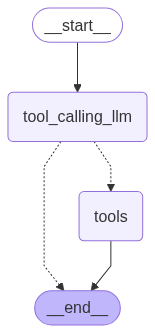

In [15]:
## Complie the grpah
builder = graph.compile()

## Display the WorkFlow of Graph
display(Image(builder.get_graph().draw_mermaid_png()))

In [16]:
messages = builder.invoke({"messages" : "What is Machine Learning?"})

for msg in messages['messages']:
    msg.pretty_print()

================================ Human Message =================================

What is Machine Learning?
================================== Ai Message ==================================
Tool Calls:
  wikipedia (vc496769v)
 Call ID: vc496769v
  Args:
    query: Machine Learning
================================= Tool Message =================================
Name: wikipedia

Page: Machine learning
Summary: Machine learning (ML) is a field of study in artificial intelligence concerned with the development and study of statistical algorithms that can learn from data and generalise to unseen data, and thus perform tasks without explicit instructions. Within a subdiscipline in machine learning, advances in the field of deep learning have allowed neural networks, a class of statistical algorithms, to surpass many previous machine learning approaches in performance.
ML fi


In [16]:
messages = builder.invoke({"messages" : "1706.03762"})

for msg in messages['messages']:
    msg.pretty_print()

================================ Human Message =================================

1706.03762
================================== Ai Message ==================================
Tool Calls:
  arxiv (sfpcchm9r)
 Call ID: sfpcchm9r
  Args:
    query: 1706.03762
================================= Tool Message =================================
Name: arxiv

Published: 2023-08-02
Title: Attention Is All You Need
Authors: Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N. Gomez, Lukasz Kaiser, Illia Polosukhin
Summary: The dominant sequence transduction models are based on complex recurrent or
convolutional neural networks in an encoder-decoder configuration. The best
performing models also connect the encoder and decoder through an attention
mechanism. We propose a new simple network architecture, the Transformer, base


In [17]:
messages = builder.invoke({"messages" : "What is the Recent News Happend In TamilNadu?"})

for msg in messages['messages']:
    msg.pretty_print()

================================ Human Message =================================

What is the Recent News Happend In TamilNadu ?
================================== Ai Message ==================================
Tool Calls:
  tavily_search (8ewts6hmf)
 Call ID: 8ewts6hmf
  Args:
    query: recent news in Tamil Nadu
    time_range: week
    topic: news
================================= Tool Message =================================
Name: tavily_search

{"query": "recent news in Tamil Nadu", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://www.thehindu.com/news/national/tamil-nadu/expert-panel-engaged-by-vedanta-recommends-green-restart-of-sterlite-copper-plant-in-thoothukudi/article69771735.ece", "title": "Expert panel engaged by Vedanta recommends ‘green restart’ of Sterlite Copper plant in Thoothukudi - The Hindu", "score": 0.6609831, "published_date": "Fri, 04 Jul 2025 08:09:00 GMT", "content": "## The committee proposes the plant can resume opera

In [18]:
messages = builder.invoke({"messages" : "Give me a general Overview of One piece?"})

for msg in messages['messages']:
    msg.pretty_print()

================================ Human Message =================================

Give me a general Overview of One piece?
================================== Ai Message ==================================
Tool Calls:
  wikipedia (k8tbw2rxb)
 Call ID: k8tbw2rxb
  Args:
    query: One Piece
================================= Tool Message =================================
Name: wikipedia

Page: One Piece
Summary: One Piece (stylized in all caps) is a Japanese manga series written and illustrated by Eiichiro Oda. It follows the adventures of Monkey D. Luffy and his crew, the Straw Hat Pirates, as he explores the Grand Line in search of the mythical treasure known as the "One Piece" to become the next King of the Pirates.
It has been serialized in Shueisha's shōnen manga magazine Weekly Shōnen Jump since July 1997, with its chapters compiled in 111 tankōbon volumes as of March 2025


## Another Workflow

In [19]:
def tool_calling_llm(state: State):
    return {"messages": [llm_with_tool.invoke(state["messages"])]}


## Build the Graph
graph1 = StateGraph(State)


## Add Nodes to Graph
graph1.add_node("tool_calling_llm", tool_calling_llm)
graph1.add_node("tools", ToolNode(tools))  ## Adding the tools to ToolNode -> Passing all Tools the ToolNode


## Add the Edges to the Grpah for Connecting the Nodes
graph1.add_edge(START, "tool_calling_llm")
graph1.add_conditional_edges(
    "tool_calling_llm",

    ## If the message from assistant is a tool call -> tools_condition routes to tools
    ## If the message from assistant is a not tool call -> tools_condition routes to END

    tools_condition,
    
)
graph1.add_edge("tools", "tool_calling_llm")
graph1.add_edge("tool_calling_llm", END)

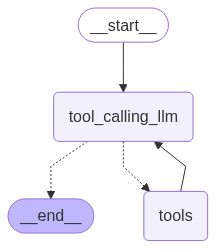

In [20]:
builder1 = graph1.compile()

## Display the WorkFlow of Graph
display(Image(builder1.get_graph().draw_mermaid_png()))

In [21]:
messages = builder1.invoke({"messages" : "Give a General Overview of One Piece and Also About the Recent Research About Rag?"})

for msg in messages['messages']:
    msg.pretty_print()

================================ Human Message =================================

Give a General Overview of One Piece and Also About the Recent Research About Rag?
================================== Ai Message ==================================
Tool Calls:
  wikipedia (cb0nbb2w3)
 Call ID: cb0nbb2w3
  Args:
    query: One Piece (manga)
  arxiv (89vrc4rxr)
 Call ID: 89vrc4rxr
  Args:
    query: RAG (Retrieval-Augmented Generation)
================================= Tool Message =================================
Name: wikipedia

Page: One Piece
Summary: One Piece (stylized in all caps) is a Japanese manga series written and illustrated by Eiichiro Oda. It follows the adventures of Monkey D. Luffy and his crew, the Straw Hat Pirates, as he explores the Grand Line in search of the mythical treasure known as the "One Piece" to become the next King of the Pirates.
It has been serialized in Shueisha's shōnen manga magazine Weekly Shōnen Jump since July 1997, with its chapters compiled in 111 

### Adding Memory for Graph

In [22]:
response = builder1.invoke({"messages":"Hello, My Name is Abi!"})

for msg in response['messages']:
    msg.pretty_print()

================================ Human Message =================================

Hello, My Name is Abi!
================================== Ai Message ==================================

Hello, Abi! How can I assist you today?


In [24]:
response = builder1.invoke({"messages":"What is My Name?"})

for msg in response['messages']:
    msg.pretty_print()

================================ Human Message =================================

What is My Name?
================================== Ai Message ==================================

I don't have access to your personal information. If you're asking for your own name, I don't have that information stored. Could you please provide your name?


In [28]:
from langgraph.checkpoint.memory import MemorySaver

memory = MemorySaver()

In [29]:
def tool_calling_llm(state: State):
    return {"messages": [llm_with_tool.invoke(state["messages"])]}


## Build the Graph
graph2 = StateGraph(State)


## Add Nodes to Graph
graph2.add_node("tool_calling_llm", tool_calling_llm)
graph2.add_node("tools", ToolNode(tools))  ## Adding the tools to ToolNode -> Passing all Tools the ToolNode


## Add the Edges to the Grpah for Connecting the Nodes
graph2.add_edge(START, "tool_calling_llm")
graph2.add_conditional_edges(
    "tool_calling_llm",

    ## If the message from assistant is a tool call -> tools_condition routes to tools
    ## If the message from assistant is a not tool call -> tools_condition routes to END

    tools_condition,
    
)
graph2.add_edge("tools", "tool_calling_llm")
graph2.add_edge("tool_calling_llm", END)    

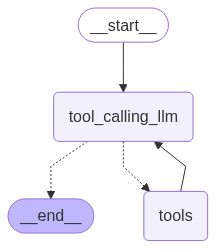

In [30]:
builder2 = graph2.compile(checkpointer= memory)

## Display the WorkFlow of Graph
display(Image(builder2.get_graph().draw_mermaid_png()))

In [33]:
config = {"configurable": {"thread_id":"1"}}

In [34]:
response = builder2.invoke({"messages":"Hello, My Name is Abi!"}, config=config)

for msg in response['messages']:
    msg.pretty_print()

================================ Human Message =================================

Hello, My Name is Abi!
================================== Ai Message ==================================

Hello Abi! How can I help you today?


In [38]:
response = builder2.invoke({"messages":"Hey What is my name?"}, config=config)

for msg in response['messages']:
    msg.pretty_print()

================================ Human Message =================================

Hello, My Name is Abi!
================================== Ai Message ==================================

Hello Abi! How can I help you today?
================================ Human Message =================================

What is My Name
================================== Ai Message ==================================

Your name is Abi! 😊 Let me know if there's anything else I can assist you with.
================================ Human Message =================================

What is My Name?
================================== Ai Message ==================================

Your name is Abi! 😊 Let me know if there's anything else I can assist you with.
================================ Human Message =================================

hey What is my name?
================================== Ai Message ==================================

Your name is Abi! 😊 Let me know if there's anything else I can assist 